# Day 08. Exercise 04
# Regression

## 0. Imports

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import (
  train_test_split
)

from sklearn.linear_model import (
  LinearRegression
)

from sklearn.tree import (
  DecisionTreeRegressor,
  plot_tree
)

from sklearn.svm import (
  SVC
)

from sklearn.metrics import (
  accuracy_score,
  mean_squared_error,
)

from sklearn.inspection import (
  DecisionBoundaryDisplay
)

from sklearn.preprocessing import (
  StandardScaler,
  OneHotEncoder
)

from sklearn.pipeline import make_pipeline

from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import (
  RandomForestRegressor
)

from sklearn.model_selection import (
  cross_val_score,
  KFold
)

import joblib


## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [111]:
df = pd.read_csv('../../datasets/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [112]:
df = df.groupby('uid').first().fillna(0)
df

,num_commits,pageviews,AVG(diff)
uid,,,
user_1,62,28.0,0.000000
user_10,20,89.0,0.000000
user_11,7,0.0,-2.000000
user_12,86,0.0,-89.000000
user_13,52,0.0,-48.500000
user_14,61,143.0,0.000000
user_15,23,0.0,-17.500000
user_16,41,0.0,-39.333333
user_17,51,47.0,0.000000


In [113]:
random_state = 21
test_size = 0.2

In [114]:
df.index

Index(['user_1', 'user_10', 'user_11', 'user_12', 'user_13', 'user_14',
       'user_15', 'user_16', 'user_17', 'user_18', 'user_19', 'user_2',
       'user_20', 'user_21', 'user_22', 'user_23', 'user_24', 'user_25',
       'user_26', 'user_27', 'user_28', 'user_29', 'user_3', 'user_30',
       'user_31', 'user_4', 'user_6', 'user_7', 'user_8'],
      dtype='object', name='uid')

In [115]:
X = df.drop('AVG(diff)', axis=1)
y = df['AVG(diff)']
y

uid
user_1       0.000000
user_10      0.000000
user_11     -2.000000
user_12    -89.000000
user_13    -48.500000
user_14      0.000000
user_15    -17.500000
user_16    -39.333333
user_17      0.000000
user_18      0.000000
user_19      0.000000
user_2    -137.200000
user_20    -27.000000
user_21      0.000000
user_22   -141.400000
user_23    -84.000000
user_24   -223.600000
user_25      0.000000
user_26    -52.333333
user_27     -5.333333
user_28      0.000000
user_29   -157.400000
user_3       0.000000
user_30      0.000000
user_31   -104.750000
user_4    -175.600000
user_6     -62.600000
user_7    -115.500000
user_8    -160.400000
Name: AVG(diff), dtype: float64

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
  X, 
  y, 
  test_size=test_size,
  random_state=random_state
)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [117]:
def crossal(n_splits, X, y, model ):
  kf = KFold(
    n_splits=n_splits,
    shuffle=True,
    random_state=random_state,
  )
  rmse = []
  for train, test in kf.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model.fit(X_train, y_train)
    rmse_train = mean_squared_error(y_train, model.predict(X_train))
    rmse_test = mean_squared_error(y_test, model.predict(X_test))
    rmse.append(rmse_test)
    print(f'train - {rmse_train}\t| test - {rmse_test}')
  print(f'average RMSE - {np.mean(rmse)}')

In [118]:
logreg = LinearRegression(
  fit_intercept=False
)
crossal(10, X, y, logreg)

train - 5295.46388834845	| test - 4356.135453423286
train - 5412.865304466857	| test - 3242.1631670283864
train - 5405.411503803197	| test - 8133.5273829168555
train - 4927.512813326553	| test - 7384.282306913413
train - 4976.706423733299	| test - 7205.4787489399505
train - 4875.961016142281	| test - 7927.077421851752
train - 5023.194064901886	| test - 8739.364611253734
train - 5684.890435230072	| test - 804.5013949019562
train - 4392.455725471922	| test - 12159.076796578904
train - 5335.670087320614	| test - 3068.5791178086515
average RMSE - 6302.018640161689


In [119]:
tree = DecisionTreeRegressor(
  max_depth=10,
)
crossal(10, X, y, tree)

train - 0.0	| test - 13730.493703703702
train - 0.0	| test - 6325.548148148147
train - 0.0	| test - 0.0
train - 0.0	| test - 6238.877407407406
train - 0.0	| test - 10275.27925925926
train - 0.0	| test - 1252.3366666666668
train - 0.0	| test - 0.0
train - 0.0	| test - 4873.456666666667
train - 0.0	| test - 13813.181203703702
train - 0.0	| test - 1647.3800000000003
average RMSE - 5815.655305555555


In [120]:
forest = RandomForestRegressor(
  max_depth=10,
  n_estimators=100,
  random_state=random_state
)
crossal(10, X, y, forest)

train - 437.675518608974	| test - 9506.903533962966
train - 506.8671323504283	| test - 6086.63726592594
train - 700.0013565982892	| test - 427.6075729259262
train - 615.1183248076918	| test - 3213.5964167407406
train - 501.7803687264952	| test - 6044.27330625926
train - 568.798795458333	| test - 2908.8027763333316
train - 623.0037139786323	| test - 66.27949141666667
train - 592.0100860299145	| test - 3296.688236490738
train - 472.99996244871727	| test - 8325.367059407412
train - 696.9782499804528	| test - 1033.9958284999977
average RMSE - 4091.0151487962976


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [121]:
predictions = pd.DataFrame(
  {
    'AVG(diff)': y_test,
    'logreg': logreg.predict(X_test),
    'tree': tree.predict(X_test),
    'forest': forest.predict(X_test)
  },
  index=X_test.index
)
predictions

,AVG(diff),logreg,tree,forest
uid,,,,
user_26,-52.333333,-34.602029,-52.333333,-107.936667
user_29,-157.400000,-49.019541,-157.400000,-118.438333
user_10,0.000000,1.909494,0.000000,-0.175000
user_2,-137.200000,-44.213703,-137.200000,-105.148333
user_14,0.000000,-24.676197,0.000000,0.000000
user_16,-39.333333,-39.407866,-39.333333,-76.306000


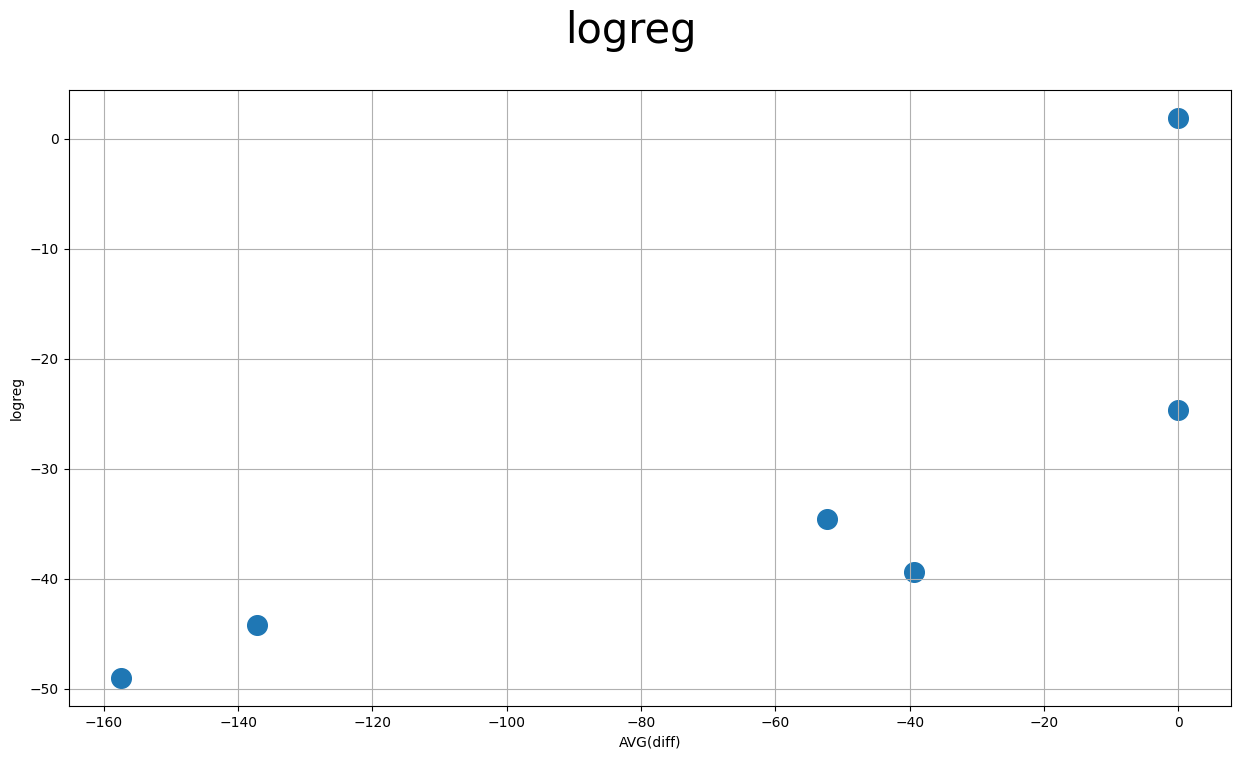

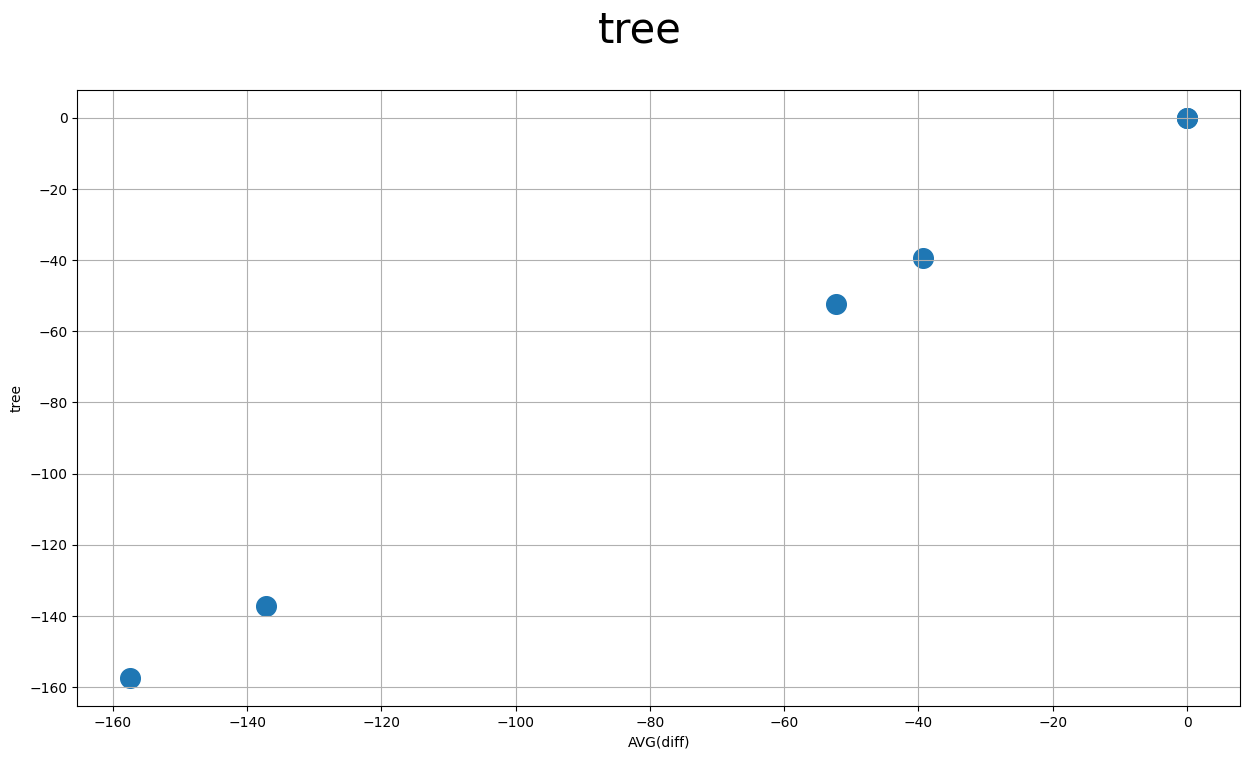

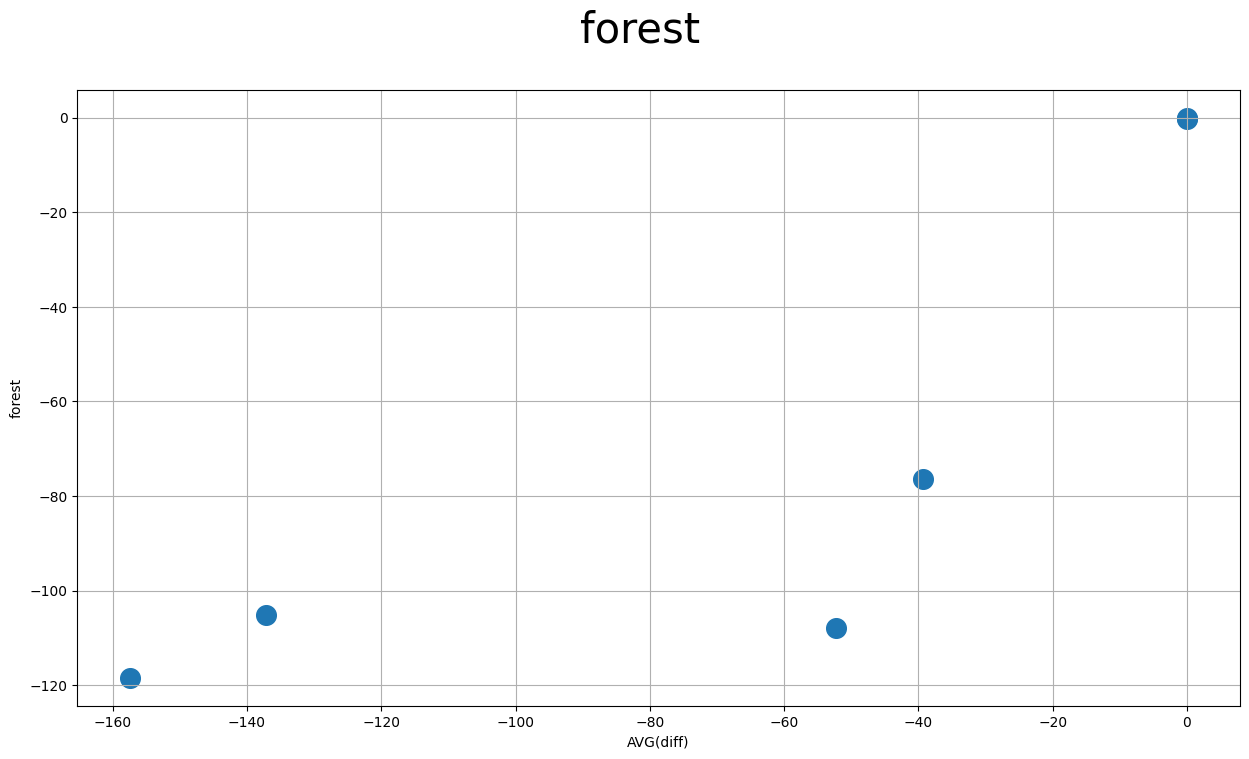

In [122]:
for model in ['logreg', 'tree', 'forest']:
  predictions.plot.scatter(x='AVG(diff)', y=model, figsize=(15, 8), s=200)
  plt.suptitle(model, fontsize=30)
  plt.grid()

Diagonal